In [1]:
import jupyter_black

jupyter_black.load()

%load_ext autoreload
%autoreload 2

In [9]:
from functools import partial

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from tp_estimator import TPEstimator

In [3]:
def objective_function(X, y, hyperparameters):
    rf = RandomForestClassifier(
        n_estimators=int(hyperparameters[0]),
        max_depth=int(hyperparameters[1]) if hyperparameters[1] > 0 else None,
        min_samples_split=int(hyperparameters[2]),
        min_samples_leaf=int(hyperparameters[3]),
    )

    # cross val maximises by default, so use negative rmse
    scores = cross_val_score(rf, X, y, cv=5, scoring="neg_root_mean_squared_error")
    return -scores.mean()  # lower rmse is better, so we minimize it

In [ ]:
# Load the red wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

# Features and target
X = data.drop("quality", axis=1)
y = data["quality"]


loaded_objective_function = partial(objective_function, X=X, y=y)

hyperparameter_ranges = [
    [10, 200],  # n_estimators
    [1, 20],  # max_depth
    [2, 20],  # min_samples_split
    [1, 10],  # min_samples_leaf
]

In [5]:
tpe = TPEstimator(
    hyperparameter_ranges=hyperparameter_ranges,
    objective_function=loaded_objective_function,
)

100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


In [6]:
best_hyperparameters = tpe.optimise()

100%|██████████| 50/50 [00:56<00:00,  1.14s/it]


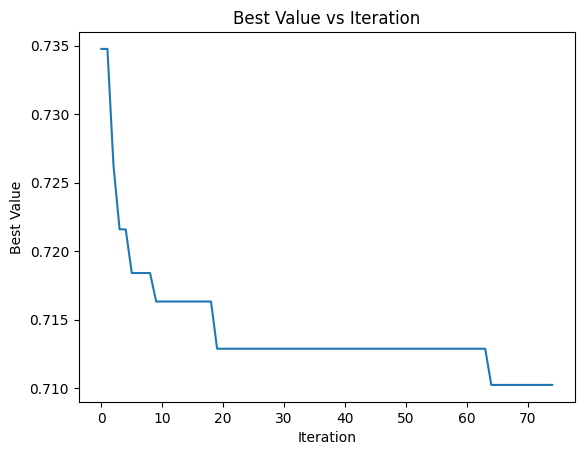

In [13]:
plt.plot(np.minimum.accumulate(tpe.values))
plt.title("Best Value vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Best Value");